<a href="https://colab.research.google.com/github/Luseat/Analisis-Sentimen-per14/blob/main/1734790323609_14_NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Sentimen Pengguna MyXL**

In [1]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
# 1. Membaca dataset

url = "https://raw.githubusercontent.com/Luseat/Analisis-Sentimen-per14/refs/heads/main/1734790346843_14B-Ulasan%2BMy%2BXL%2B1000%2BData%2BLabelled.csv"
data = pd.read_csv(url, sep=';')


# Tampilkan informasi awal tentang dataset
print("Dataset Preview:")
print(data.head())
print("\nInformasi Dataset:")
data.info()

Dataset Preview:
               userName  score                at  \
0        Deden Herdiana      4  11/02/2022 08:42   
1        Herry Ghunawan      1  11/02/2022 07:53   
2                Miyuki      5  11/02/2022 05:50   
3  Wildan Saat Almaarif      2  11/02/2022 05:33   
4       putri purwantiy      3  11/02/2022 03:10   

                                              Review Sentiment  
0  Harusnya dikasih bintang 4 bilang terimakasih....  negative  
1  Tolong dong masalah jaringan hampir setiap har...  negative  
2  Saya mau komen lagi,miminnnn kenapa akhir akhi...  negative  
3  Bonus kouta tiktok 13gb tidak diaktifkan/tidak...  negative  
4  Sejauh ini bagusÂ² aja sih apk nya, tpi udh bb...   neutral  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userName   1000 non-null   object
 1   score      1000 non-null   int64 

In [8]:
# 2. Preprocessing teks
def preprocess_text(text):
    text = text.lower()  # Mengubah teks menjadi huruf kecil
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Hanya menyimpan huruf dan angka
    return text

# Asumsikan kolom "Review" berisi teks ulasan dan "Sentiment" adalah label sentimen.
data['Review'] = data['Review'].astype(str).apply(preprocess_text)

In [9]:
# 3. Membagi data menjadi pelatihan dan pengujian
X = data['Review']  # Fitur teks
y = data['Sentiment']  # Label sentimen

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# 4. Mengubah teks menjadi representasi numerik menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
# 5. Melatih model klasifikasi sederhana (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42)

In [12]:
# 6. Mengevaluasi model
y_pred = model.predict(X_test_tfidf)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")



Confusion Matrix:
[[119   2   2]
 [ 39   5   1]
 [ 22   3   7]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.66      0.97      0.79       123
     neutral       0.50      0.11      0.18        45
    positive       0.70      0.22      0.33        32

    accuracy                           0.66       200
   macro avg       0.62      0.43      0.43       200
weighted avg       0.63      0.66      0.58       200


Accuracy: 65.50%


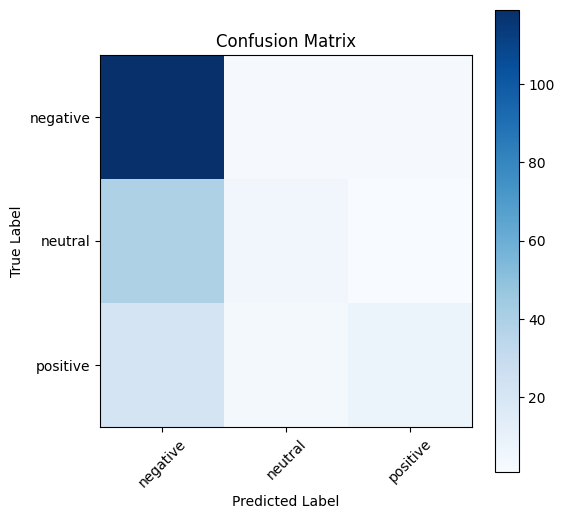

In [13]:
# 7. Visualisasi hasil
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(model.classes_)), model.classes_, rotation=45)
plt.yticks(np.arange(len(model.classes_)), model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()